<hr style="height:2px;">

# Demo: Neural network training for denoising of *Tribolium castaneum*

This notebook demonstrates training a CARE model for a 3D denoising task, assuming that training data was already generated via [1_datagen.ipynb](1_datagen.ipynb) and has been saved to disk to the file ``data/my_training_data.npz``.

Note that training a neural network for actual use should be done on more (representative) data and with more training time.

More Documentation is available at http://csbdeep.bioimagecomputing.com/doc/.

In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from csbdeep.utils import axes_dict, plot_some, plot_history
from csbdeep.utils.tf import limit_gpu_memory
from csbdeep.io import load_training_data
from csbdeep.models import Config, CARE

Using TensorFlow backend.


The TensorFlow backend uses all available GPU memory by default, hence it can be useful to limit it:

In [ ]:
# limit_gpu_memory(fraction=1/2)

<hr style="height:2px;">

# Training data

Load training data generated via [1_datagen.ipynb](1_datagen.ipynb), use 10% as validation data.

In [2]:
(X,Y), (X_val,Y_val), axes = load_training_data('/data/u934/service_imagerie/v_kapoor/CARESimulatedStephanTrainingData/my_training_data.npz', validation_split=0.1, verbose=True)

c = axes_dict(axes)['C']
n_channel_in, n_channel_out = X.shape[c], Y.shape[c]

number of training images:	 4608
number of validation images:	 512
image size (3D):		 (16, 64, 64)
axes:				 SZYXC
channels in / out:		 1 / 1


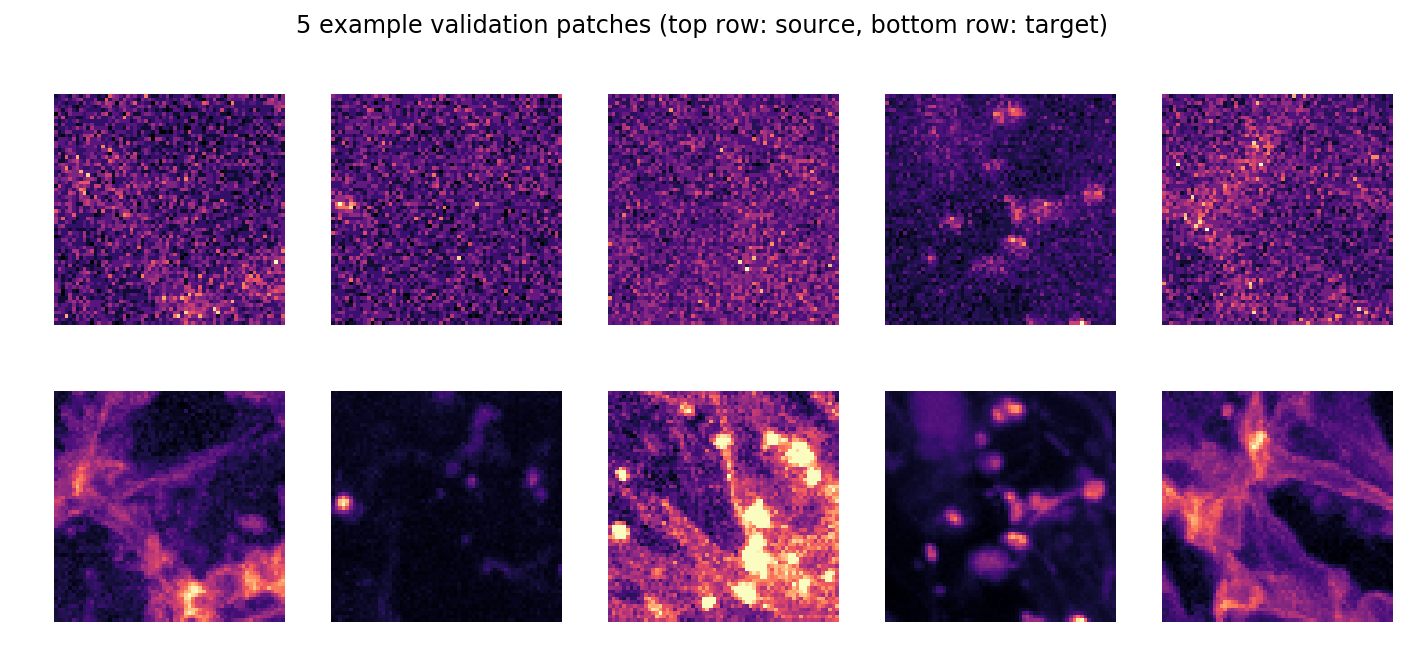

In [3]:
plt.figure(figsize=(12,5))
plot_some(X_val[:5],Y_val[:5])
plt.suptitle('5 example validation patches (top row: source, bottom row: target)');

<hr style="height:2px;">

# CARE model

Before we construct the actual CARE model, we have to define its configuration via a `Config` object, which includes 
* parameters of the underlying neural network,
* the learning rate,
* the number of parameter updates per epoch,
* the loss function, and
* whether the model is probabilistic or not.

The defaults should be sensible in many cases, so a change should only be necessary if the training process fails.  

---

<span style="color:red">**Important**</span>: Note that for this notebook we use a very small number of update steps per epoch for immediate feedback, whereas this number should be increased considerably (e.g. `train_steps_per_epoch=400`) to obtain a well-trained model.

In [4]:
config = Config(axes, n_channel_in, n_channel_out, train_steps_per_epoch=400)
print(config)
vars(config)

Config(axes=u'ZYXC', n_channel_in=1, n_channel_out=1, n_dim=3, probabilistic=False, train_batch_size=16, train_checkpoint=u'weights_best.h5', train_epochs=100, train_learning_rate=0.0004, train_loss=u'mae', train_reduce_lr={u'patience': 10, u'factor': 0.5}, train_steps_per_epoch=400, train_tensorboard=True, unet_input_shape=(None, None, None, 1), unet_kern_size=3, unet_last_activation=u'linear', unet_n_depth=2, unet_n_first=32, unet_residual=True)


{'axes': u'ZYXC',
 'n_channel_in': 1,
 'n_channel_out': 1,
 'n_dim': 3,
 'probabilistic': False,
 'train_batch_size': 16,
 'train_checkpoint': u'weights_best.h5',
 'train_epochs': 100,
 'train_learning_rate': 0.0004,
 'train_loss': u'mae',
 'train_reduce_lr': {u'factor': 0.5, u'patience': 10},
 'train_steps_per_epoch': 400,
 'train_tensorboard': True,
 'unet_input_shape': (None, None, None, 1),
 'unet_kern_size': 3,
 'unet_last_activation': u'linear',
 'unet_n_depth': 2,
 'unet_n_first': 32,
 'unet_residual': True}

We now create a CARE model with the chosen configuration:

In [5]:
model = CARE(config, 'my_model', basedir='models')

<hr style="height:2px;">

# Training

Training the model may take some time.

You can monitor the progress during training with [TensorBoard](https://www.tensorflow.org/programmers_guide/summaries_and_tensorboard) by starting it from the current working directory:

    $ tensorboard --logdir=. --reload-interval=2

Then connect to [http://localhost:6006/](http://localhost:6006/) with your browser.

In [6]:
history = model.train(X,Y, validation_data=(X_val,Y_val))

Epoch 1/100
400/400 [==============================] - 635s 2s/step - loss: 0.1233 - mse: 0.0241 - mae: 0.1233 - val_loss: 0.1168 - val_mse: 0.0213 - val_mae: 0.1168
Epoch 2/100
400/400 [==============================] - 634s 2s/step - loss: 0.1044 - mse: 0.0175 - mae: 0.1044 - val_loss: 0.0979 - val_mse: 0.0157 - val_mae: 0.0979
Epoch 3/100
400/400 [==============================] - 633s 2s/step - loss: 0.0978 - mse: 0.0161 - mae: 0.0978 - val_loss: 0.1041 - val_mse: 0.0174 - val_mae: 0.1041
Epoch 4/100
400/400 [==============================] - 631s 2s/step - loss: 0.0915 - mse: 0.0145 - mae: 0.0915 - val_loss: 0.0846 - val_mse: 0.0125 - val_mae: 0.0846
Epoch 5/100
400/400 [==============================] - 632s 2s/step - loss: 0.0818 - mse: 0.0122 - mae: 0.0818 - val_loss: 0.0788 - val_mse: 0.0117 - val_mae: 0.0788
Epoch 6/100
400/400 [==============================] - 632s 2s/step - loss: 0.0767 - mse: 0.0110 - mae: 0.0767 - val_loss: 0.0726 - val_mse: 0.0098 - val_mae: 0.0726
Epoc

400/400 [==============================] - 631s 2s/step - loss: 0.0457 - mse: 0.0039 - mae: 0.0457 - val_loss: 0.0579 - val_mse: 0.0070 - val_mae: 0.0579
Epoch 51/100
400/400 [==============================] - 630s 2s/step - loss: 0.0452 - mse: 0.0038 - mae: 0.0452 - val_loss: 0.0577 - val_mse: 0.0071 - val_mae: 0.0577
Epoch 52/100
400/400 [==============================] - 630s 2s/step - loss: 0.0489 - mse: 0.0046 - mae: 0.0489 - val_loss: 0.0581 - val_mse: 0.0070 - val_mae: 0.0581
Epoch 53/100
400/400 [==============================] - 630s 2s/step - loss: 0.0461 - mse: 0.0039 - mae: 0.0461 - val_loss: 0.0591 - val_mse: 0.0073 - val_mae: 0.0591
Epoch 54/100
400/400 [==============================] - 630s 2s/step - loss: 0.0452 - mse: 0.0038 - mae: 0.0452 - val_loss: 0.0583 - val_mse: 0.0072 - val_mae: 0.0583
Epoch 55/100
400/400 [==============================] - 631s 2s/step - loss: 0.0445 - mse: 0.0036 - mae: 0.0445 - val_loss: 0.0577 - val_mse: 0.0071 - val_mae: 0.0577
Epoch 56/10

400/400 [==============================] - 630s 2s/step - loss: 0.0404 - mse: 0.0030 - mae: 0.0404 - val_loss: 0.0578 - val_mse: 0.0072 - val_mae: 0.0578
Epoch 98/100
400/400 [==============================] - 630s 2s/step - loss: 0.0404 - mse: 0.0030 - mae: 0.0404 - val_loss: 0.0576 - val_mse: 0.0071 - val_mae: 0.0576
Epoch 99/100
400/400 [==============================] - 630s 2s/step - loss: 0.0403 - mse: 0.0030 - mae: 0.0403 - val_loss: 0.0578 - val_mse: 0.0072 - val_mae: 0.0578
Epoch 100/100
400/400 [==============================] - 630s 2s/step - loss: 0.0404 - mse: 0.0030 - mae: 0.0404 - val_loss: 0.0577 - val_mse: 0.0071 - val_mae: 0.0577


Plot final training history (available in TensorBoard during training):

['loss', 'lr', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse']


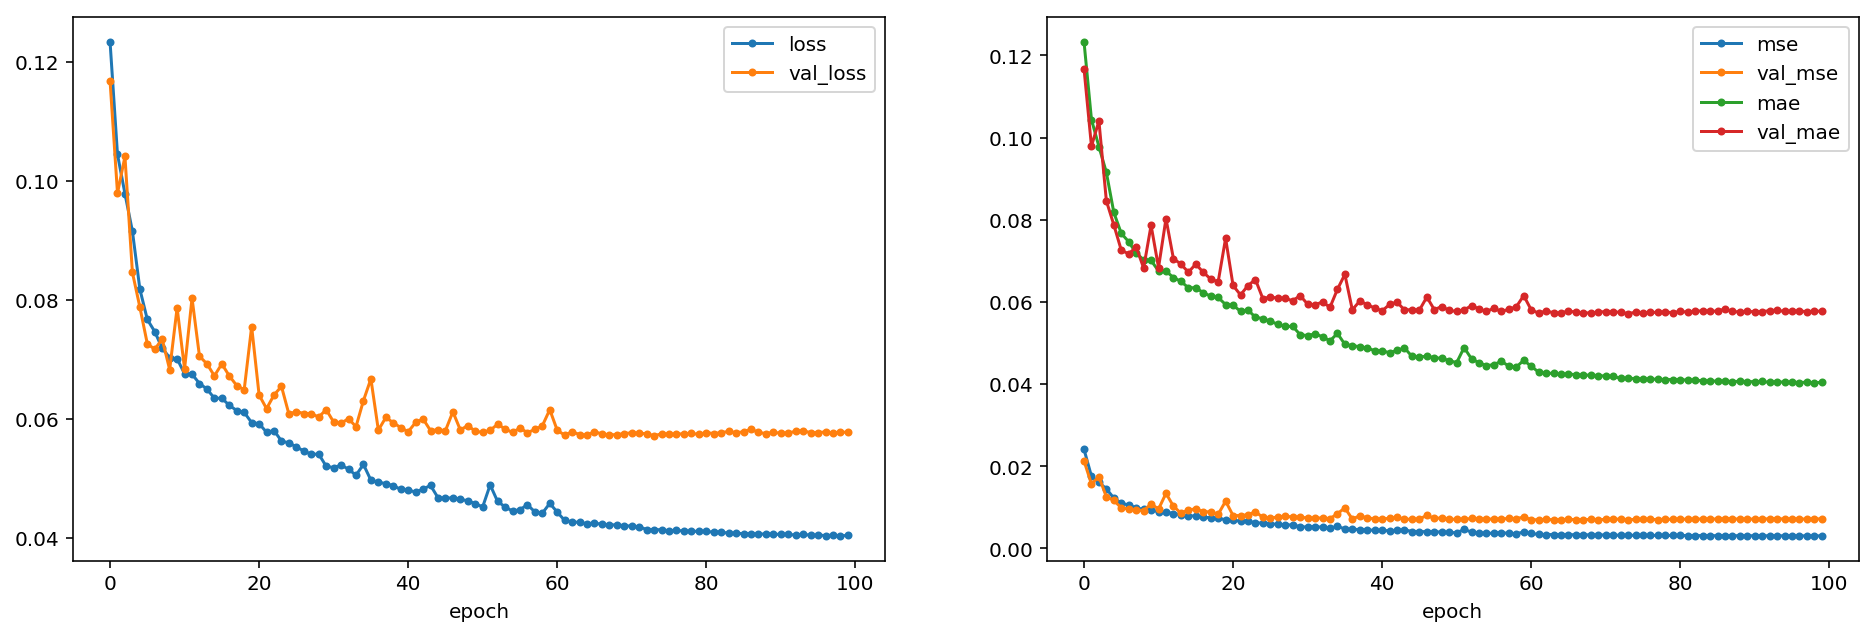

In [7]:
print(sorted(list(history.history.keys())))
plt.figure(figsize=(16,5))
plot_history(history,['loss','val_loss'],['mse','val_mse','mae','val_mae']);

<hr style="height:2px;">

# Evaluation

Example results for validation images.

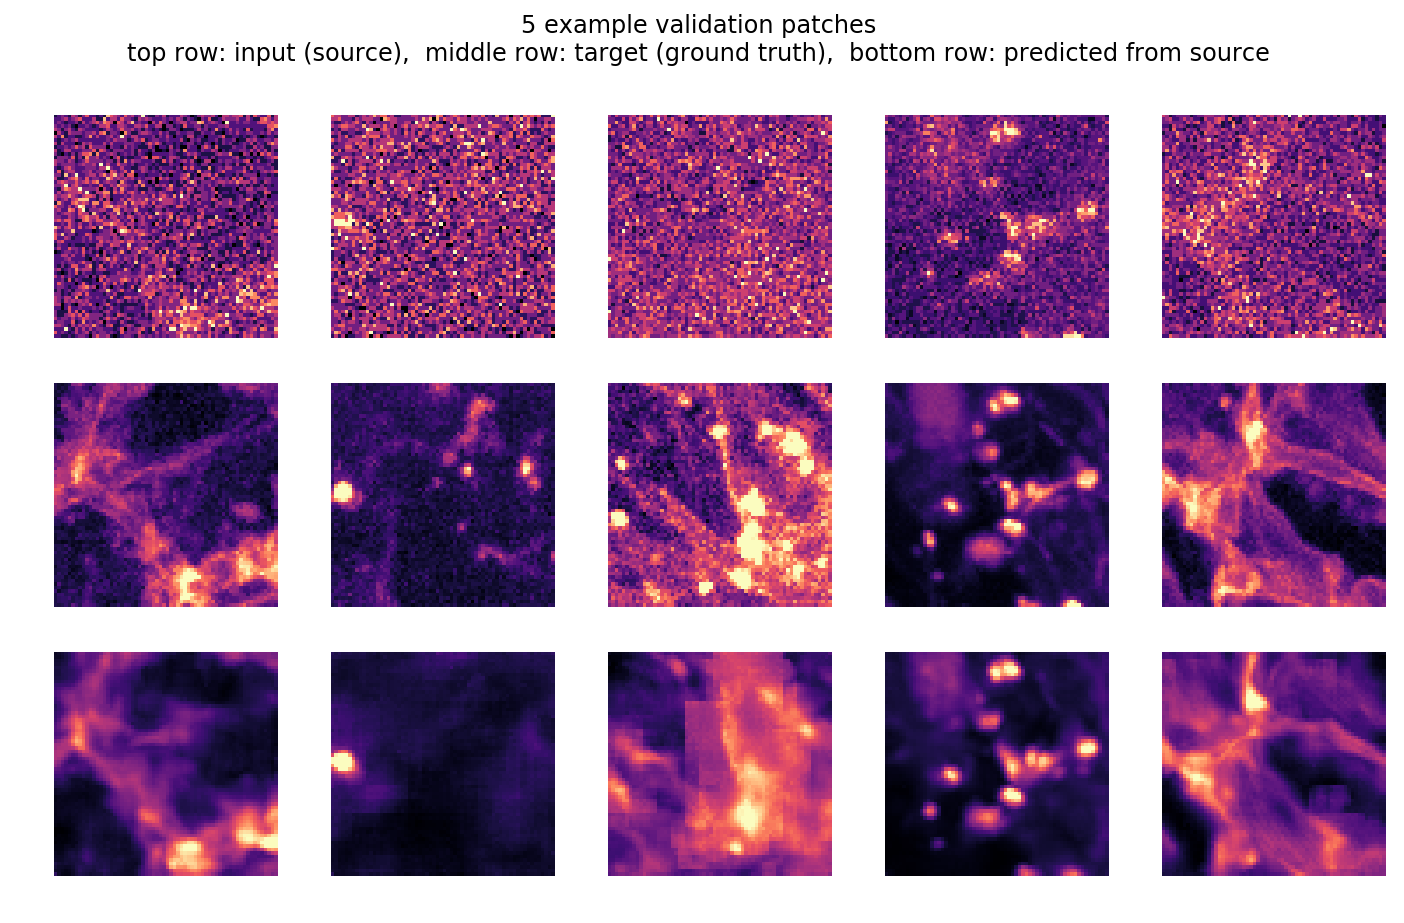

In [8]:
plt.figure(figsize=(12,7))
_P = model.keras_model.predict(X_val[:5])
if config.probabilistic:
    _P = _P[...,:(_P.shape[-1]//2)]
plot_some(X_val[:5],Y_val[:5],_P,pmax=99.5)
plt.suptitle('5 example validation patches\n'      
             'top row: input (source),  '          
             'middle row: target (ground truth),  '
             'bottom row: predicted from source');

<hr style="height:2px;">

# Export model to be used with CSBDeep **Fiji** plugins and **KNIME** workflows

See https://github.com/CSBDeep/CSBDeep_website/wiki/Your-Model-in-Fiji for details.

In [9]:
model.export_TF()

INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: /tmp/tmpFbWPg4/model/saved_model.pb

Model exported in TensorFlow's SavedModel format:
/data/u934/service_imagerie/v_kapoor/anaconda2/bin/CSBDeep/examples/denoising3D/models/my_model/TF_SavedModel.zip
